In [1]:
with open('3sat.dimacs', 'r', encoding='utf8') as f:
    dimacs = f.read()
print(dimacs)  # let's check the file is as promised

c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0


In [2]:
from qiskit.circuit.library import PhaseOracle
oracle = PhaseOracle.from_dimacs_file('3sat.dimacs')
oracle.draw()

q_0: ─o───────o───────────
      │ ┌───┐ │ ┌───┐┌───┐
q_1: ─■─┤ X ├─■─┤ X ├┤ Z ├
      │ ├───┤   └───┘└───┘
q_2: ─o─┤ Z ├─────────────
        └───┘

In [3]:
from qiskit import QuantumCircuit
init = QuantumCircuit(3)
init.h([0,1,2])
init.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [4]:
# steps 2 & 3 of Grover's algorithm
from qiskit.circuit.library import GroverOperator
grover_operator = GroverOperator(oracle)

In [5]:
qc = init.compose(grover_operator)
qc.measure_all()
qc.draw()

┌───┐┌────┐ ░ ┌─┐      
   q_0: ┤ H ├┤0   ├─░─┤M├──────
        ├───┤│    │ ░ └╥┘┌─┐   
   q_1: ┤ H ├┤1 Q ├─░──╫─┤M├───
        ├───┤│    │ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤2   ├─░──╫──╫─┤M├
        └───┘└────┘ ░  ║  ║ └╥┘
meas: 3/═══════════════╩══╩══╩═
                       0  1  2

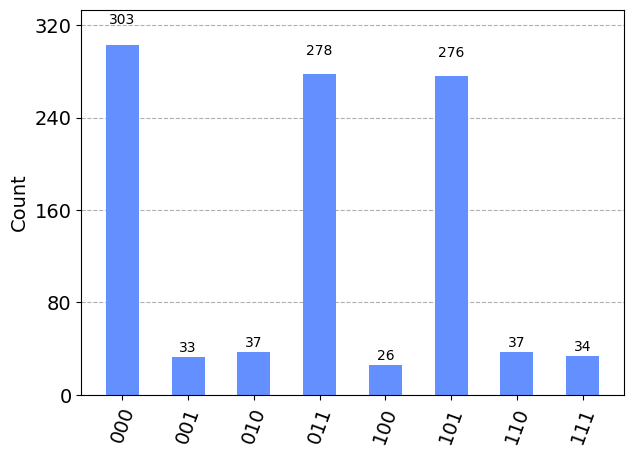

In [6]:
# Simulate the circuit
from qiskit import Aer, transpile
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, sim)
counts = sim.run(t_qc).result().get_counts()

# plot the results
from qiskit.visualization import plot_histogram
plot_histogram(counts)